# Stock Market Prediction And Forecasting Using Stacked LSTM


In [27]:
# Loading the dataset

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd


df = pd.read_csv("C:/Users/aruna/Downloads/NSE-TATAGLOBAL11.csv")

In [28]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


## Basic data Exploration

In [29]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [30]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


## Time Series Visualization

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df['Date'] = pd.to_datetime(df['Date'])

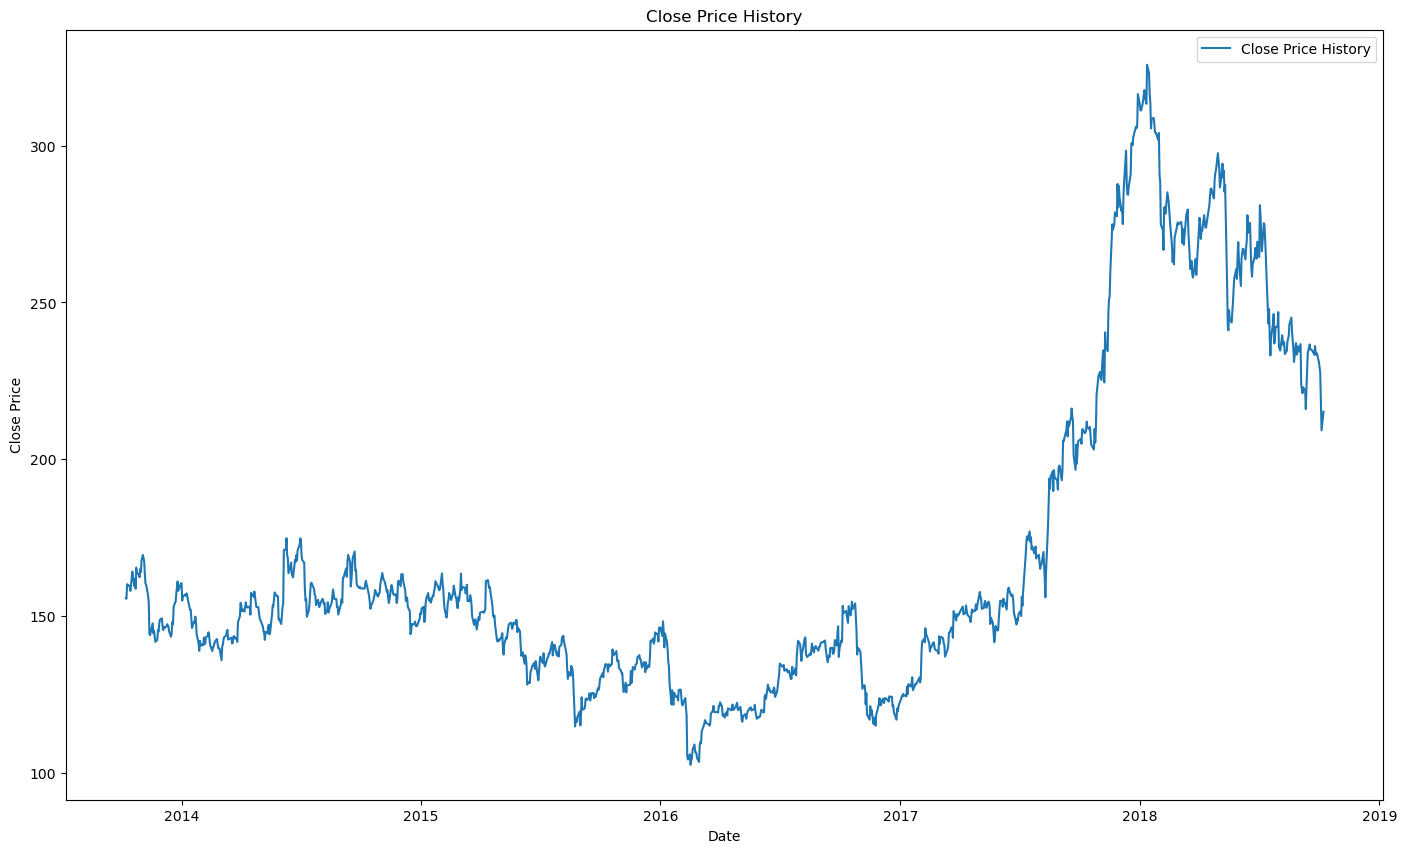

In [34]:
plt.figure(figsize=(17, 10))
plt.plot(df['Date'], df['Close'], label='Close Price History')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()



# There is a huge dip in 2016

# There is a steep rise from 2017 t0 2018

## Correlation Analysis

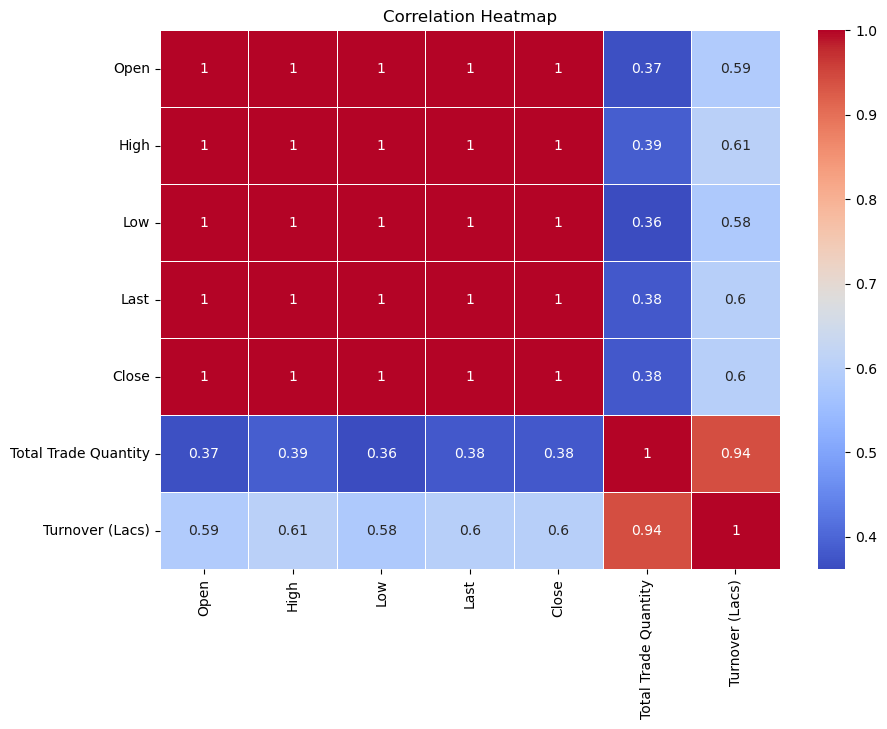

In [35]:

correlation_matrix = df.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## Feature Selection

In [36]:
X = df.drop(['Close','Date'], axis =1)
Y = df['Close']

## Normalize the Data

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X

array([[0.46728972, 0.52487174, 0.48206632, 0.5077233 , 0.15613048,
        0.17859642],
       [0.50734312, 0.508588  , 0.47778028, 0.48197896, 0.11753994,
        0.13085399],
       [0.53627058, 0.54963194, 0.52402436, 0.5133199 , 0.05598347,
        0.0662942 ],
       ...,
       [0.23587005, 0.25072496, 0.25197383, 0.25833893, 0.1039734 ,
        0.08720148],
       [0.23453494, 0.23912559, 0.24430408, 0.23595254, 0.0670108 ,
        0.05530494],
       [0.24032043, 0.23734107, 0.24904128, 0.23819118, 0.05569565,
        0.04603696]])

In [38]:
Y= scaler.fit_transform(Y.values.reshape(-1, 1))
Y

array([[0.50425818],
       [0.47758853],
       [0.51792918],
       ...,
       [0.25773196],
       [0.2371134 ],
       [0.23823398]])

## Cross Validation

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)


In [40]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


## Reshaping for LSTM model 

####  [samples, time steps, features]

In [41]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

## Train model

In [50]:
model.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
31/31 [==============================] - 0s 8ms/step - loss: 2.2420e-05
Epoch 2/100
31/31 [==============================] - 0s 8ms/step - loss: 2.1627e-05
Epoch 3/100
31/31 [==============================] - 0s 8ms/step - loss: 2.1447e-05
Epoch 4/100
31/31 [==============================] - 0s 8ms/step - loss: 2.1431e-05
Epoch 5/100
31/31 [==============================] - 0s 8ms/step - loss: 1.8648e-05
Epoch 6/100
31/31 [==============================] - 0s 9ms/step - loss: 1.8716e-05
Epoch 7/100
31/31 [==============================] - 0s 8ms/step - loss: 1.8210e-05
Epoch 8/100
31/31 [==============================] - 0s 8ms/step - loss: 1.7039e-05
Epoch 9/100
31/31 [==============================] - 0s 8ms/step - loss: 1.8065e-05
Epoch 10/100
31/31 [==============================] - 0s 7ms/step - loss: 1.6492e-05
Epoch 11/100
31/31 [==============================] - 0s 8ms/step - loss: 1.6854e-05
Epoch 12/100
31/31 [==============================] - 0s 8ms/step - loss: 

31/31 [==============================] - 0s 7ms/step - loss: 1.0372e-05
Epoch 98/100
31/31 [==============================] - 0s 8ms/step - loss: 6.8281e-06
Epoch 99/100
31/31 [==============================] - 0s 7ms/step - loss: 8.0957e-06
Epoch 100/100
31/31 [==============================] - 0s 8ms/step - loss: 7.6643e-06


In [52]:
loss = model.evaluate(X_test, Y_test)
print(f'Loss: {loss}')

8/8 [==============================] - 3s 5ms/step - loss: 4.7550e-06
Loss: 4.755046575155575e-06


## Prediction

In [53]:
y_pred = model.predict(X_test)


y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(Y_test)

8/8 [==============================] - 0s 4ms/step


In [54]:
y_pred_original

array([[160.15474],
       [159.80045],
       [159.33919],
       [159.83269],
       [159.51561],
       [159.53293],
       [161.36159],
       [164.79764],
       [165.64229],
       [169.87509],
       [169.37325],
       [164.54898],
       [160.72119],
       [160.40056],
       [167.40402],
       [169.17339],
       [167.38896],
       [162.53279],
       [164.67639],
       [164.74065],
       [162.02237],
       [162.88904],
       [154.48735],
       [155.52661],
       [153.71849],
       [151.30823],
       [153.42104],
       [153.15512],
       [156.03056],
       [156.18553],
       [157.84415],
       [158.28151],
       [156.41469],
       [154.20723],
       [152.12314],
       [151.31143],
       [154.4558 ],
       [152.1342 ],
       [150.53937],
       [154.16217],
       [154.38892],
       [154.75679],
       [155.66566],
       [154.96521],
       [154.08647],
       [153.22667],
       [154.77545],
       [153.60735],
       [157.10553],
       [157.15288],


In [55]:
y_test_original

array([[160.25],
       [158.8 ],
       [158.85],
       [159.35],
       [159.  ],
       [159.65],
       [160.3 ],
       [164.75],
       [164.45],
       [170.6 ],
       [168.6 ],
       [164.85],
       [161.6 ],
       [159.45],
       [167.2 ],
       [169.55],
       [167.4 ],
       [162.55],
       [165.2 ],
       [164.6 ],
       [162.25],
       [162.2 ],
       [154.25],
       [155.4 ],
       [153.9 ],
       [150.5 ],
       [153.1 ],
       [152.95],
       [155.45],
       [155.45],
       [157.1 ],
       [158.5 ],
       [156.5 ],
       [154.4 ],
       [152.1 ],
       [151.15],
       [154.45],
       [151.9 ],
       [150.65],
       [154.15],
       [153.8 ],
       [154.9 ],
       [155.5 ],
       [154.3 ],
       [153.5 ],
       [152.9 ],
       [155.2 ],
       [153.5 ],
       [156.55],
       [156.8 ],
       [158.7 ],
       [159.2 ],
       [160.65],
       [160.35],
       [157.2 ],
       [153.75],
       [151.8 ],
       [149.8 ],
       [155.45

## Evaluation metrics

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = mean_squared_error(y_test_original, y_pred_original, squared=False)  
r2 = r2_score(y_test_original, y_pred_original)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 0.3871281056268976
Root Mean Squared Error (RMSE): 0.4864933610567119
R-squared (R2): 0.9969494243735164


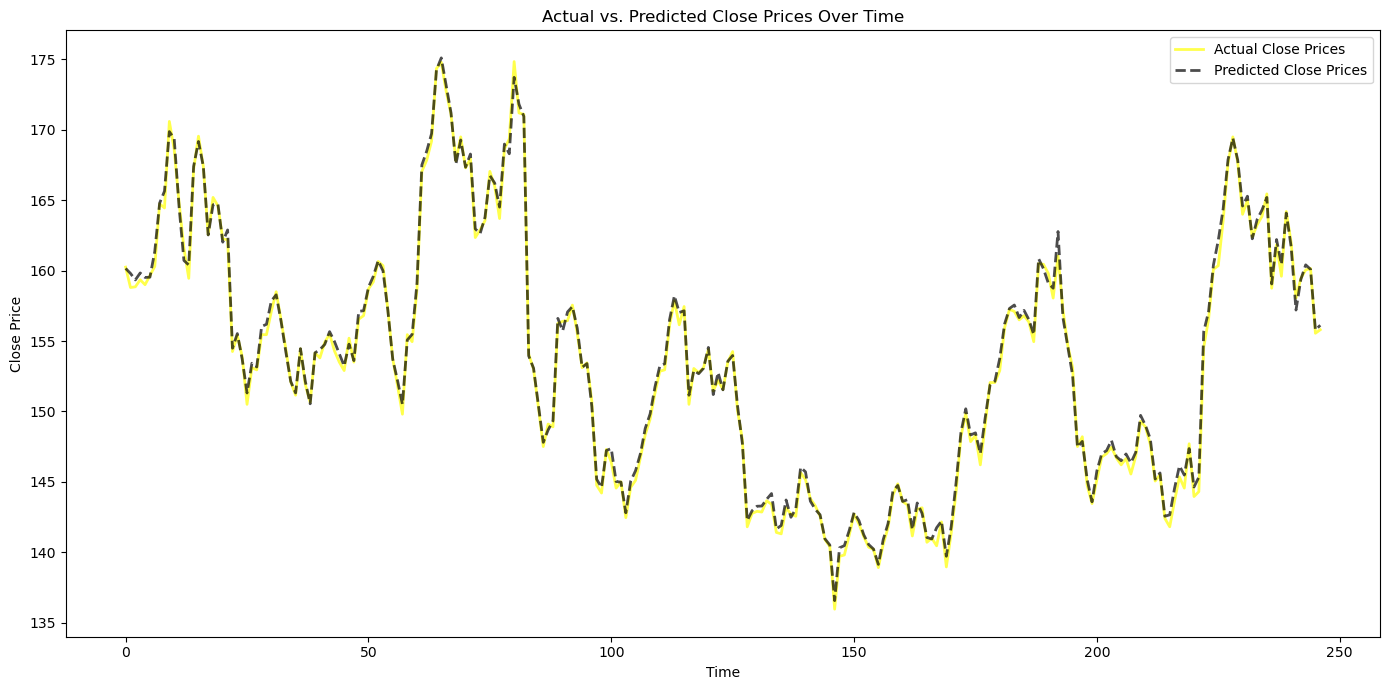

In [72]:

time = range(len(y_test_original))

plt.figure(figsize=(14, 7))
plt.plot(time, y_test_original, label='Actual Close Prices', color='yellow', alpha=0.7, linewidth=2)


plt.plot(time, y_pred_original, label='Predicted Close Prices', color='black', alpha=0.7, linestyle='--', linewidth=2)


plt.title('Actual vs. Predicted Close Prices Over Time')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.show()


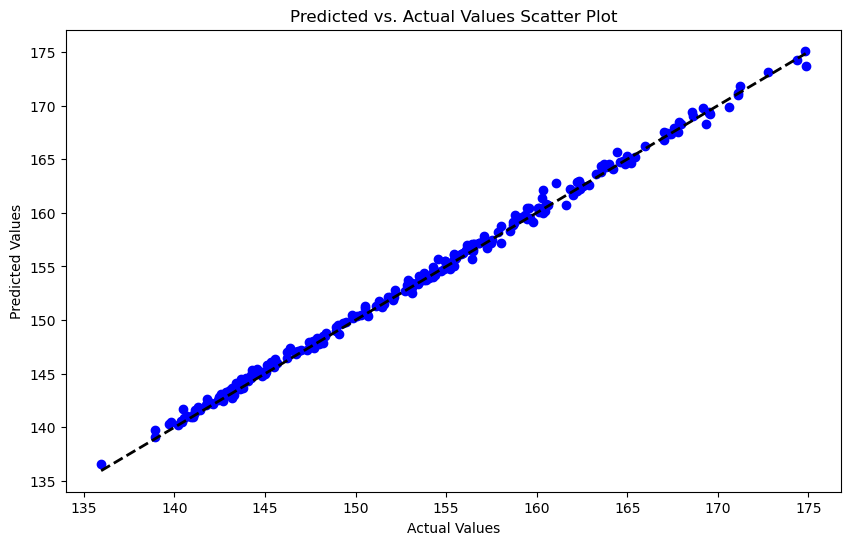

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_original, color='blue', label='Predicted vs. Actual')

plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'k--', lw=2)


plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values Scatter Plot')

plt.show()


# Conclusion

### Based on these evaluation metrics, it appears that the stacked LSTM model is performing exceptionally well on the stock price prediction task. The high R-squared value (0.9969 indicates a strong correlation between the predicted and actual values, while the low MAE and RMSE values (0.3871 and 0.4865 respectively) suggest that the model's predictions are accurate and reliable.